<a href="https://colab.research.google.com/github/ykato27/Auto-Encorder/blob/main/Sparse_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sparse Autoencoder

In [1]:
!pip install pycodestyle flake8 pycodestyle_magic

In [2]:
%load_ext pycodestyle_magic

In [3]:
import numpy as np
from keras import regularizers
from keras.datasets import mnist
from keras.layers import Dense, Input
from keras.models import Model

In [4]:
encoding_dim = 32
l1 = 1e-6
input_img = Input(shape=(784,))

# activity regularizerを加える
encoded = Dense(
    encoding_dim, activation="relu", activity_regularizer=regularizers.l1(l1)
)(input_img)
decoded = Dense(784, activation="sigmoid")(encoded)
autoencoder = Model(input_img, decoded)

l1 = 10e-7  # L1正則化のパラメータ
enc_dim = 512  # 隠れ層のユニット数

autoencoder.compile(optimizer="adadelta", loss="binary_crossentropy")

In [5]:
import numpy as np
from keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [6]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=500,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
)

Epoch 1/500
235/235 [==============================] - 17s 11ms/step - loss: 0.6946 - val_loss: 0.6946
Epoch 2/500
235/235 [==============================] - 2s 9ms/step - loss: 0.6945 - val_loss: 0.6944
Epoch 3/500
235/235 [==============================] - 2s 10ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 4/500
235/235 [==============================] - 2s 10ms/step - loss: 0.6942 - val_loss: 0.6942
Epoch 5/500
235/235 [==============================] - 2s 10ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 6/500
235/235 [==============================] - 2s 10ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 7/500
235/235 [==============================] - 2s 10ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 8/500
235/235 [==============================] - 2s 10ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 9/500
235/235 [==============================] - 2s 9ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 10/500
235/235 [==============================] - 2s 10ms/step - loss: 0.6935

In [7]:
import matplotlib.pyplot as plt

# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)

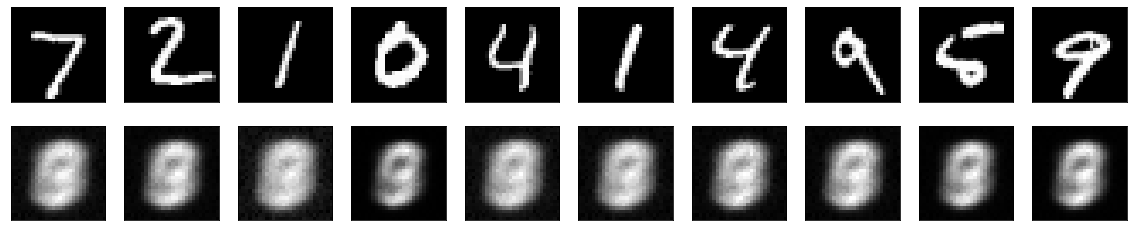

In [8]:
# 何個表示するか
# plt.subplot(行数, 列数, 何番目のプロットか)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)  # 軸の値の表示を無効化
    ax.get_yaxis().set_visible(False)  # 軸の値の表示を無効化
plt.show()

In [9]:
encoder = Model(input_img, decoded)
encoded_imgs = encoder.predict(x_test)

print("encoded img mean:", encoded_imgs.mean())

encoded img mean: 0.15291682
